<a href="https://colab.research.google.com/github/gundasai/deeplearning/blob/master/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import keras
keras.backend.clear_session()

In [ ]:
import tensorflow as tf
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Default GPU Device: /device:GPU:0


In [ ]:
pip install tensorflow

In [ ]:
import keras
import numpy as np
import random
import tensorflow as tf
 
keras.backend.clear_session()
random.seed(42)
np.random.seed(42)
#tf.set_random_seed(42)

In [ ]:
from keras.layers import *
import keras
from keras.models import Sequential,Model
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline
!pip install medpy
from medpy.metric import dc, precision, recall,jc
#!pip install -U scipy==1.2.0
import os
import cv2
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

     |████████████████████████████████| 153kB 8.5MB/s 
     |████████████████████████████████| 47.4MB 67kB/s 
  Created wheel for medpy: filename=MedPy-0.4.0-cp37-cp37m-linux_x86_64.whl size=754472 sha256=dae873ed448af819859cf58b7713b65f1a3af8443fd05ee44fddbf43384d8758
  Stored in directory: /root/.cache/pip/wheels/8c/c9/9c/2c6281c7a72b9fb1570862a4f028af7ce38405008354fbf870
Successfully built medpy


In [ ]:
!pip install --quiet nibabel
import nibabel as nib
import matplotlib.pylab as plt
import numpy as np
import os

In [ ]:
trainx=[]
trainy=[]
for i in range(1,10):
  img=nib.load(os.path.join('/content/drive/My Drive/imagesTr/','iseg_' + str(i) + '_0000.nii.gz')).get_data()
  trainx.append(img)
  img=nib.load(os.path.join('/content/drive/My Drive/labelsTr/','iseg_' + str(i) + '.nii.gz')).get_data()
  trainy.append(img)
'''trainx1=tf.image.adjust_gamma(trainx,0.9,1)
trainx1=np.array(trainx1)
trainx3=tf.image.adjust_gamma(trainx,1,1)
trainx3=np.array(trainx3)
trainx5=tf.image.adjust_gamma(trainx,1.1,1)
trainx5=np.array(trainx5)
trainx1=np.concatenate([trainx1,trainx3,trainx5])
trainx=trainx1
trainy=np.concatenate([trainy,trainy,trainy])'''
trainx=tf.image.adjust_gamma(trainx,1.1,1)
import numpy as np
trainx=np.array(trainx)
trainy=np.array(trainy)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  


In [ ]:
testx=[]
testy=[]
for i in range(10,11):
  img=nib.load(os.path.join('/content/drive/My Drive/imagesTr/','iseg_' + str(i) + '_0000.nii.gz')).get_data()
  testx.append(img)
  img=nib.load(os.path.join('/content/drive/My Drive/labelsTr/','iseg_' + str(i) + '.nii.gz')).get_data()
  testy.append(img)
testx=tf.image.adjust_gamma(testx,1.1,1)
import numpy as np
testx=np.array(testx)
testy=np.array(testy)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  


In [ ]:
print(len(trainx))
print(len(trainy))
print(trainx.shape)
print(trainy.shape)

print(len(testx))
print(len(testy))
print(testx.shape)
print(testy.shape)

9
9
(9, 144, 192, 256)
(9, 144, 192, 256)
1
1
(1, 144, 192, 256)
(1, 144, 192, 256)


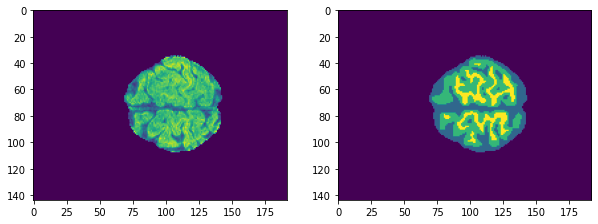

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(121).imshow(np.take(trainx[1], 180, 2))
plt.subplot(122).imshow(np.take(trainy[1],180,2))

In [ ]:
from keras_preprocessing.image import ImageDataGenerator
seed = 2018
bs = 1

In [ ]:
'''
from matplotlib import pyplot
trainaugx=[]
trainaugy=[]
datagen = ImageDataGenerator(rotation_range=20)
it = datagen.flow(trainx, seed=seed, batch_size=bs, shuffle=False)
it1= datagen.flow(trainy, seed=seed, batch_size=bs, shuffle=False)
for i in range(3):
  batch=it.next()
  batch1=it1.next()
  trainaugx.append(batch[0])
  trainaugy.append(batch1[0])

datagen = ImageDataGenerator(rotation_range=45,zoom_range=[0.3,0.6])
it = datagen.flow(trainx, seed=seed, batch_size=bs, shuffle=False)
it1= datagen.flow(trainy, seed=seed, batch_size=bs, shuffle=False)
for i in range(3):
  batch=it.next()
  batch1=it1.next()
  trainaugx.append(batch[0])
  trainaugy.append(batch1[0])

datagen = ImageDataGenerator(zoom_range=[0.5,0.9])
it = datagen.flow(trainx, seed=seed, batch_size=bs, shuffle=False)
it1= datagen.flow(trainy, seed=seed, batch_size=bs, shuffle=False)
for i in range(5):
  batch=it.next()
  batch1=it1.next()
  trainaugx.append(batch[0])
  trainaugy.append(batch1[0])

trainaugx=np.array(trainaugx)
trainaugy=np.array(trainaugy)
'''

'\nfrom matplotlib import pyplot\ntrainaugx=[]\ntrainaugy=[]\ndatagen = ImageDataGenerator(rotation_range=20)\nit = datagen.flow(trainx, seed=seed, batch_size=bs, shuffle=False)\nit1= datagen.flow(trainy, seed=seed, batch_size=bs, shuffle=False)\nfor i in range(3):\n  batch=it.next()\n  batch1=it1.next()\n  trainaugx.append(batch[0])\n  trainaugy.append(batch1[0])\n\ndatagen = ImageDataGenerator(rotation_range=45,zoom_range=[0.3,0.6])\nit = datagen.flow(trainx, seed=seed, batch_size=bs, shuffle=False)\nit1= datagen.flow(trainy, seed=seed, batch_size=bs, shuffle=False)\nfor i in range(3):\n  batch=it.next()\n  batch1=it1.next()\n  trainaugx.append(batch[0])\n  trainaugy.append(batch1[0])\n\ndatagen = ImageDataGenerator(zoom_range=[0.5,0.9])\nit = datagen.flow(trainx, seed=seed, batch_size=bs, shuffle=False)\nit1= datagen.flow(trainy, seed=seed, batch_size=bs, shuffle=False)\nfor i in range(5):\n  batch=it.next()\n  batch1=it1.next()\n  trainaugx.append(batch[0])\n  trainaugy.append(batc

In [ ]:
'''
trainx=np.concatenate((trainx,trainaugx))
trainy=np.concatenate((trainy,trainaugy))
'''

'\ntrainx=np.concatenate((trainx,trainaugx))\ntrainy=np.concatenate((trainy,trainaugy))\n'

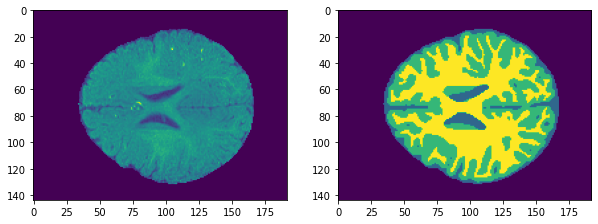

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(121).imshow(np.take(trainx[1], 150, 2))
plt.subplot(122).imshow(np.take(trainy[1],150,2))

In [ ]:
trainy = trainy.astype('float32')
testy = testy.astype('float32')
trainy1=trainy
from tensorflow.keras.utils import to_categorical
trainy = to_categorical(trainy,num_classes=None)
testy = to_categorical(testy,num_classes=None)

In [ ]:
trainy = trainy.reshape(9, 144, 192, 256,4) 
trainx = trainx.reshape(9,144,192,256)
testy = testy.reshape(1, 144, 192, 256,4) 
testx = testx.reshape(1,144,192,256)

In [ ]:
print(trainx.shape[1],trainx.shape[2],trainx.shape[3])

144 192 256


In [ ]:
heiufkbekjc

NameError: ignored

In [ ]:
def unet_depth2(input_height=trainx.shape[1], input_width=trainx.shape[2]):

    img_input = Input(shape=(input_height,input_width,trainx.shape[3],1))
    
    conv1 = Conv3D(16, 3 , padding='same')(img_input)
    conv1=BatchNormalization()(conv1)
    conv1=LeakyReLU(alpha=0.3)(conv1)
    conv1 = Conv3D(16, 3 , padding='same')(conv1)
    conv1=BatchNormalization()(conv1)
    conv1=LeakyReLU(alpha=0.3)(conv1)
    pool1 = MaxPooling3D(pool_size=(2, 2, 2))(conv1)
    pool1 = Dropout(0.6)(pool1)
    
    
    conv2 = Conv3D(32, 3, padding='same')(pool1)
    conv2=BatchNormalization()(conv2)
    conv2=LeakyReLU(alpha=0.3)(conv2)
    conv2 = Conv3D(32, 3, padding='same')(conv2)
    conv2=BatchNormalization()(conv2)
    conv2=LeakyReLU(alpha=0.3)(conv2)
    pool2 = MaxPooling3D(pool_size=(2, 2, 2))(conv2)
    pool2 = Dropout(0.6)(pool2)
    

    conv3 = Conv3D(64, 3 ,padding='same')(pool2)
    conv3=BatchNormalization()(conv3)
    conv3=LeakyReLU(alpha=0.3)(conv3)
    conv3 = Conv3D(64, 3 ,padding='same')(conv3)
    conv3=BatchNormalization()(conv3)
    conv3=LeakyReLU(alpha=0.3)(conv3)
    pool3 = MaxPooling3D(pool_size=(2, 2, 2))(conv3)
    pool3 = Dropout(0.6)(pool3)
    

    conv4 = Conv3D(128, 3 , padding='same')(pool3)
    conv4=BatchNormalization()(conv4)
    conv4=LeakyReLU(alpha=0.3)(conv4)
    conv4 = Conv3D(128, 3 , padding='same')(conv4)
    conv4=BatchNormalization()(conv4)
    conv4=LeakyReLU(alpha=0.3)(conv4)
    pool4 = MaxPooling3D(pool_size=(2, 2, 2))(conv4)
    pool4 = Dropout(0.6)(pool4)
    
 

    conv5 = Conv3D(256, 3 , padding='same')(pool4)
    conv5=LeakyReLU(alpha=0.3)(conv5)
    conv5=BatchNormalization()(conv5)
    conv5 = Conv3D(256, 3 , padding='same')(conv5)
    conv5=LeakyReLU(alpha=0.3)(conv5)
    conv5=BatchNormalization()(conv5)
    conv5= Dropout(0.6)(conv5)
    


    conv6 = Conv3D(128, 3, padding='same')(conv5)
    conv6=BatchNormalization()(conv6)
    conv6=LeakyReLU(alpha=0.3)(conv6)
    conv6 = Conv3D(128, 3, padding='same')(conv6)
    conv6=BatchNormalization()(conv6)
    conv6=LeakyReLU(alpha=0.3)(conv6)
    up1 = UpSampling3D((2, 2,2))(conv6)
    up1 = Dropout(0.6)(up1)
    
    
    skip1  = concatenate([up1,conv4])
    
    conv7 = Conv3D(64, 3,padding='same')(skip1)
    conv7=BatchNormalization()(conv7)
    conv7=LeakyReLU(alpha=0.3)(conv7)
    conv7 = Conv3D(64, 3,padding='same')(conv7)
    conv7=BatchNormalization()(conv7)
    conv7=LeakyReLU(alpha=0.3)(conv7)
    up2 = UpSampling3D((2, 2,2))(conv7)
    up2 = Dropout(0.6)(up2)
    
    
    
    skip2  = concatenate([up2,conv3])

    conv8 = Conv3D(32, 3,padding='same')(skip2)
    conv8=BatchNormalization()(conv8)
    conv8=LeakyReLU(alpha=0.3)(conv8)
    conv8 = Conv3D(32, 3,padding='same')(conv8)
    conv8=BatchNormalization()(conv8)
    conv8=LeakyReLU(alpha=0.3)(conv8)
    up3 = UpSampling3D((2, 2,2))(conv8)
    up3 = Dropout(0.6)(up3)
    
    
    skip3  = concatenate([up3,conv2])

    conv9 = Conv3D(16, 3, padding='same')(skip3)
    conv9=BatchNormalization()(conv9)
    conv9=LeakyReLU(alpha=0.3)(conv9)
    conv9 = Conv3D(16, 3, padding='same')(conv9)
    conv9=BatchNormalization()(conv9)
    conv9=LeakyReLU(alpha=0.3)(conv9)
    up4 = UpSampling3D((2, 2,2))(conv9)
    up4 = Dropout(0.6)(up4)
    
    
    skip4  = concatenate([up4,conv1])
    
    conv10 = Conv3D(16, 3,  padding='same')(skip4)
    conv10=BatchNormalization()(conv10)
    conv10 = Dropout(0.6)(conv10)


    o = Conv3D( 4 , 1 ,activation = 'softmax' ,padding='same')(conv10)
    
    model = Model(inputs=[img_input], outputs=[ o ])
    
    return model

model=unet_depth2()
model.summary()

In [ ]:
import math
from keras.callbacks import EarlyStopping,ModelCheckpoint
os.chdir('/content/drive/My Drive/results')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5000)
mc = ModelCheckpoint('final.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)
cv = keras.callbacks.CSVLogger('final.csv', separator=',', append=False)

In [ ]:
from keras import backend as K
smooth=1
def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2*(intersection + smooth)) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true,y_pred)

In [ ]:
optimizer=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

In [ ]:
from keras import backend as K
model.compile(loss=dice_coef_loss, optimizer=optimizer, metrics=[dice_coef])

In [ ]:
'''from keras.models import load_model
from keras import backend as K
model = load_model("iseg2019_untitled1.h5", custom_objects={'dice_coef_loss': dice_coef_loss, 'dice_coef': dice_coef})
model.compile(loss=dice_coef_loss, optimizer=optimizer, metrics=[dice_coef])'''

In [ ]:
import os
os.getcwd()
os.chdir('/content/drive/My Drive/results')

In [ ]:
'''from keras.models import load_model
model = tf.keras.models.load_model("june24.h5",compile=True, custom_objects={'dice_coef_loss': dice_coef_loss, 'dice_coef': dice_coef})'''

In [ ]:
from keras import backend as K
model.compile(loss=dice_coef_loss, optimizer=optimizer, metrics=[dice_coef])

In [ ]:
history=model.fit(trainx,trainy,batch_size=1,callbacks=[es,mc,cv],epochs=500,validation_data=(testx, testy))

In [ ]:
model.evaluate(testx,testy,batch_size=1)

In [ ]:
import os
os.getcwd()
os.chdir('/content/drive/My Drive/results')

In [ ]:
from keras.models import load_model
model2 = tf.keras.models.load_model("final.h5",compile=True, custom_objects={'dice_coef_loss': dice_coef_loss, 'dice_coef': dice_coef})

In [ ]:
preds = model2.predict(testx, verbose = 1,batch_size=1)
preds.shape
preds = np.around(preds)

1/1 [==============================] - 33s 33s/step


In [ ]:
#model2.save("iseg2019_milestoneorginal_newtrick3.h5")

In [ ]:
print(preds.shape)
preds=preds.reshape(1,144,192,256,4)

(1, 144, 192, 256, 4)


In [ ]:
def dice(true, preds):  
    scores  = []
    for i in range(len(true)):
        im1 = true[i][:,:,:,3]
        im2 = preds[i][:,:,:,3]
        intersection = np.logical_and(im1, im2)
        score = 2. * intersection.sum() / (im1.sum() + im2.sum())
        scores.append(score)
    return np.array(scores).mean(), scores

In [ ]:
avg_d_score, d_scores = dice(testy, np.around(preds))
print(avg_d_score)

0.8342059430491336


In [ ]:
np.mean(d_scores)

0.8342059430491336

In [ ]:
def dice(true, preds):  
    scores  = []
    for i in range(len(true)):
        im1 = true[i][:,:,:,2]
        im2 = preds[i][:,:,:,2]
        intersection = np.logical_and(im1, im2)
        score = 2. * intersection.sum() / (im1.sum() + im2.sum())
        scores.append(score)
    return np.array(scores).mean(), scores

In [ ]:
avg_d_score, d_scores = dice(testy, np.around(preds))
print(avg_d_score)

0.8948032431268971


In [ ]:
def dice(true, preds):  
    scores  = []
    for i in range(len(true)):
        im1 = true[i][:,:,:,1]
        im2 = preds[i][:,:,:,1]
        intersection = np.logical_and(im1, im2)
        score = 2. * intersection.sum() / (im1.sum() + im2.sum())
        scores.append(score)
    return np.array(scores).mean(), scores

In [ ]:
avg_d_score, d_scores = dice(testy, np.around(preds))
print(avg_d_score)

TypeError: ignored

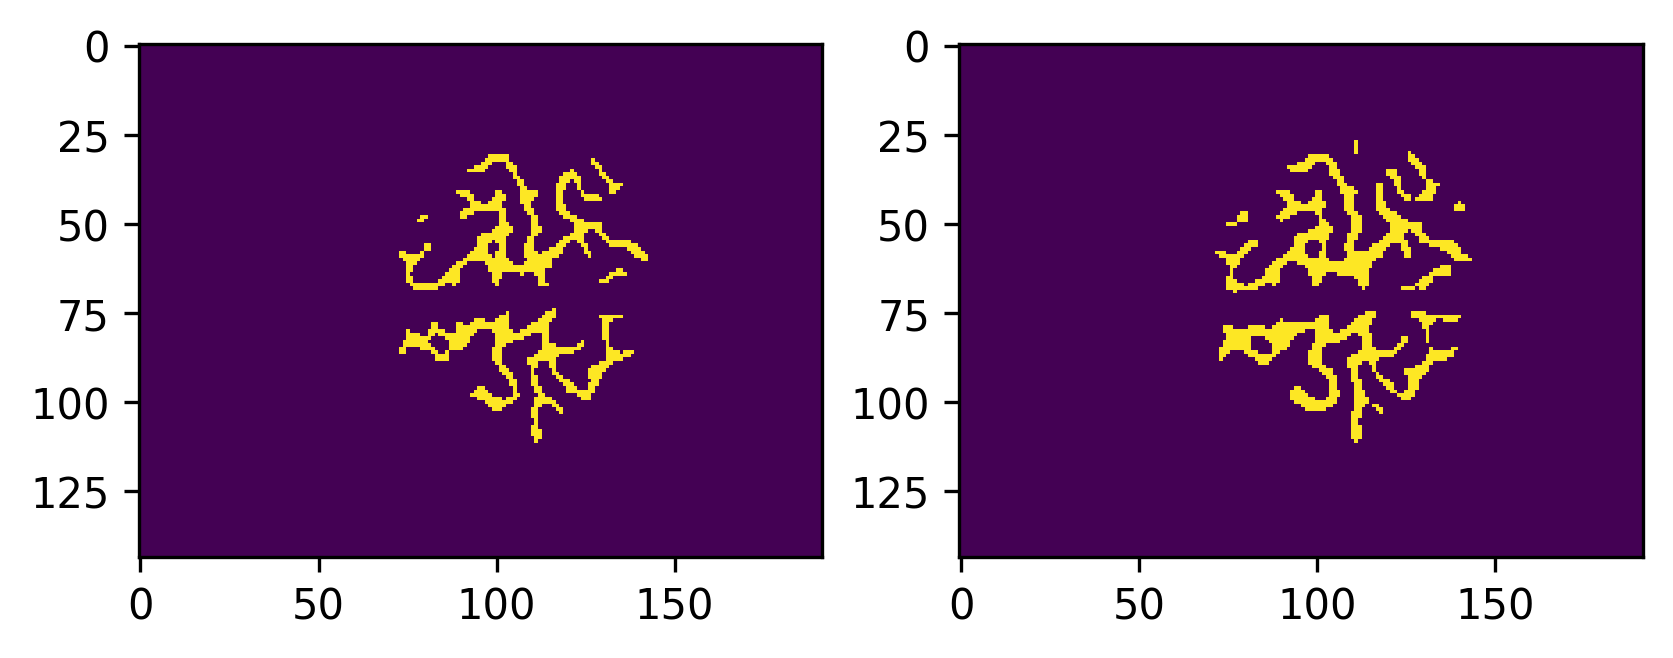

In [ ]:
idxx=0 #1
plt.figure(figsize=(10,10))
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] =300
#plt.subplot(131).imshow(testx[idxx][:,:,180])
plt.subplot(131).imshow(testy[idxx][:,:,180,3])
plt.subplot(132).imshow(preds[idxx][:,:,180,3])

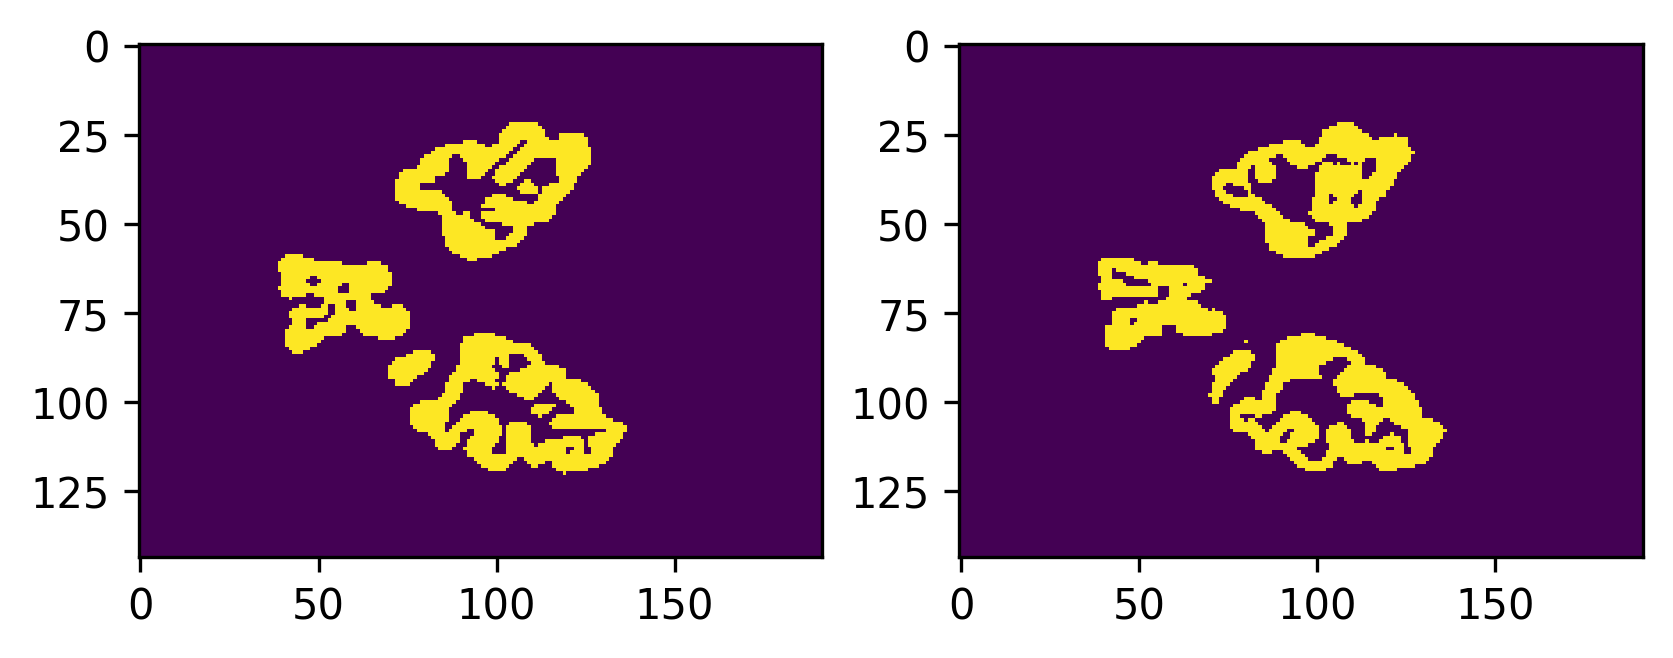

In [ ]:
idxx=0 #1
plt.figure(figsize=(10,10))
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] =300
#plt.subplot(131).imshow(testx[idxx][:,:,120])
plt.subplot(131).imshow(testy[idxx][:,:,120,2])
plt.subplot(132).imshow(preds[idxx][:,:,120,2])

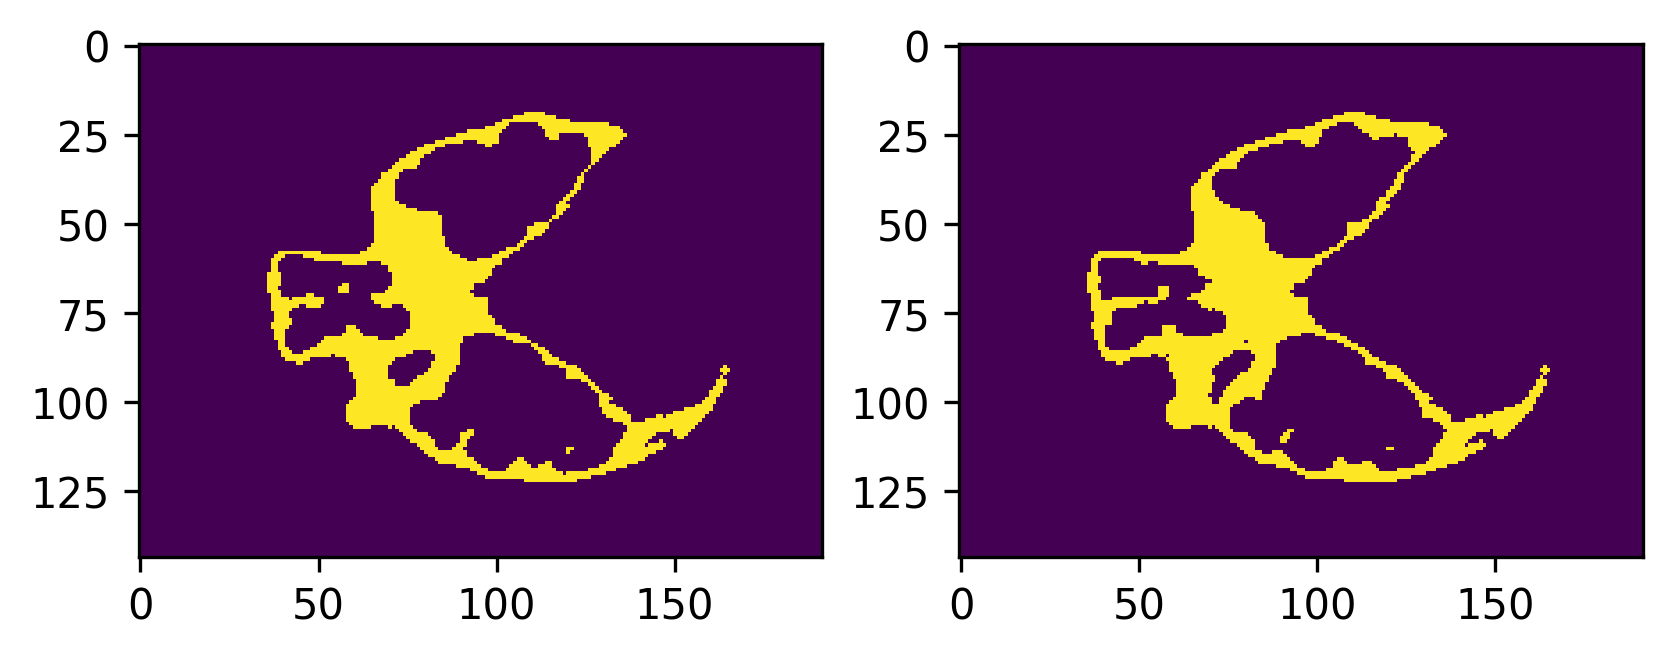

In [ ]:
idxx=0 #1
plt.figure(figsize=(10,10))
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] =300
#plt.subplot(131).imshow(testx[idxx][:,:,120])
plt.subplot(131).imshow(testy[idxx][:,:,120,1])
plt.subplot(132).imshow(preds[idxx][:,:,120,1])

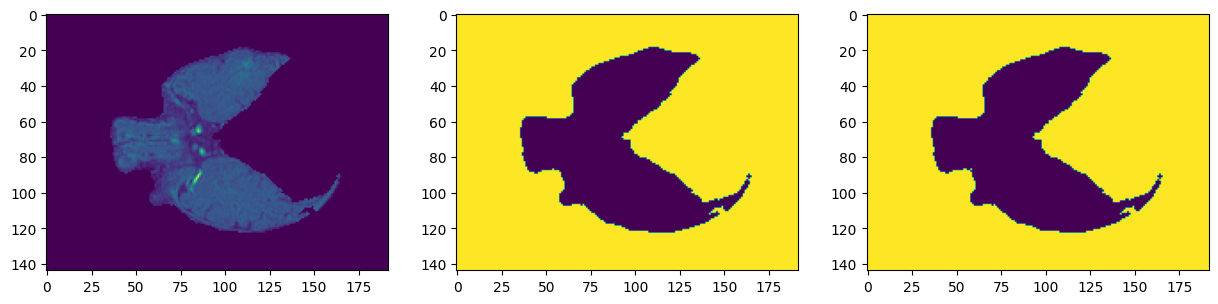

In [ ]:
idxx=0 #1
plt.figure(figsize=(15,15))
plt.subplot(131).imshow(testx[idxx][:,:,120])
plt.subplot(132).imshow(testy[idxx][:,:,120,0])
plt.subplot(133).imshow(preds[idxx][:,:,120,0])

In [ ]:
print(preds[0,:,:,15,3])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
test_pred = model2.predict(testx, batch_size=1)
test_result = np.zeros(test_pred.shape)
test_result[test_pred>0.5] = 1
test_result[test_pred<=0.5] = 0
test_result=test_result.reshape(1,144,192,256,4)
dice = dc(test_result, testy)
pre  = precision(test_result,testy)
re   = recall(test_result,testy)
print('Test dc: '  + str(dice))
print('Test pre: ' + str(pre))
print('Test re: '  + str(re))

Test dc: 0.9883397107236656
Test pre: 0.9883423638534301
Test re: 0.9883370576081453
